In [16]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

In [3]:
# some weird artefact in roads file: it opens fine in QGIS, but not via GeoPandas
# try dict 
dict_vars = {
    'osm_id': 'str'#, 
    #'code': 'str', 
    #'fclass': 'str', 
    #'name': 'str', 
    #'ref': 'str', 
    #'oneway': 'str', 
    #'maxspeed': int, 
    #'layer': int, 
    #'bridge': 'str', 
    #'tunnel': 'str'
}

In [4]:
roads = gpd.read_file('C:/Users/barguzin/YandexDisk/ucsb/ucsb_summer2022/WRMP/clipped_OSM/gis_osm_roads_free_1_clipped.geojson', 
dtype=dict_vars)

print(roads.shape)

(25872, 11)


<AxesSubplot:>

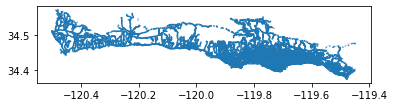

In [5]:
roads.plot()

In [6]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,16226626,5142,track,None,None,B,0,0,F,F,"LINESTRING (-120.22686 34.54989, -120.22678 34..."
1,16226555,5122,residential,None,None,B,0,0,F,F,"LINESTRING (-120.21936 34.55437, -120.21942 34..."
2,645821790,5141,service,None,None,F,0,0,F,F,"LINESTRING (-119.80821 34.54406, -119.80839 34..."
3,223427020,5141,service,None,None,B,0,0,F,F,"LINESTRING (-119.79027 34.54423, -119.79036 34..."
4,645821792,5141,service,None,None,F,0,0,F,F,"LINESTRING (-119.80821 34.54406, -119.80806 34..."


In [7]:
print(roads.crs) 
roads.dtypes

epsg:4326


osm_id        object
code           int64
fclass        object
name          object
ref           object
oneway        object
maxspeed       int64
layer          int64
bridge        object
tunnel        object
geometry    geometry
dtype: object

In [8]:
# read study area
sa = gpd.read_file('C:/Users/barguzin/Downloads/roadsevac_demo2_epsg26910.geojson')
print(sa.crs)

epsg:26910


In [9]:
sa.to_crs('epsg:4326', inplace=True)

In [10]:
roads.fclass.value_counts()

service           11287
footway            5376
residential        3601
path               1386
track               883
secondary           771
tertiary            451
cycleway            422
steps               308
primary             217
motorway_link       194
motorway            189
pedestrian          174
unclassified        140
track_grade3         87
track_grade5         73
trunk                72
track_grade2         69
living_street        51
track_grade4         34
track_grade1         24
trunk_link           22
secondary_link       15
primary_link         12
tertiary_link        11
bridleway             3
Name: fclass, dtype: int64

(34.44142492359789, 34.469804752065684)

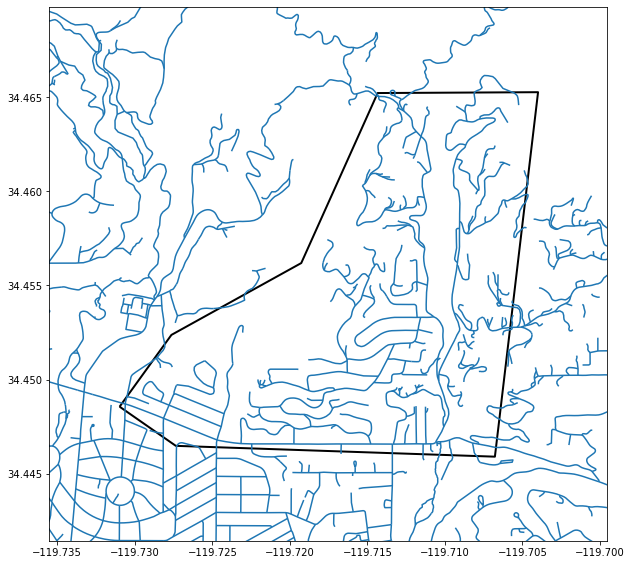

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

sa.plot(ax=ax, color='w', edgecolor='k', lw=2)
roads.plot(ax=ax)

# zoom to area
minx, miny, maxx, maxy = sa.total_bounds;
ax.set_xlim(minx-0.0045, maxx+0.0045)
ax.set_ylim(miny-0.0045, maxy+0.0045)

In [18]:
G = ox.graph.graph_from_polygon(sa.geometry[0])

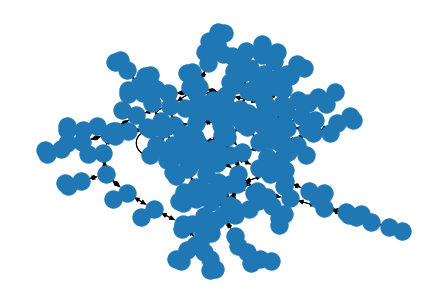

In [20]:
nx.draw(G)

In [30]:
gdf_sa = ox.geometries_from_polygon(sa.geometry[0], 
    tags={'building': True})

c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


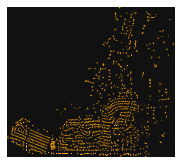

In [31]:
fig, ax = ox.plot_footprints(gdf_sa, figsize=(3, 3))

In [35]:
bld = gpd.read_file('C:/Users/barguzin/YandexDisk/ucsb/ucsb_summer2022/WRMP/clipped_OSM/gis_osm_buildings_a_free_1_clipped.geojson')

c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

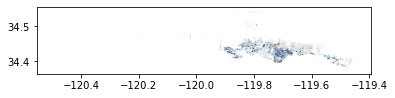

In [36]:
bld.plot()

c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\barguzin\anaconda3\envs\geoviz\lib\si

(34.44142492359789, 34.469804752065684)

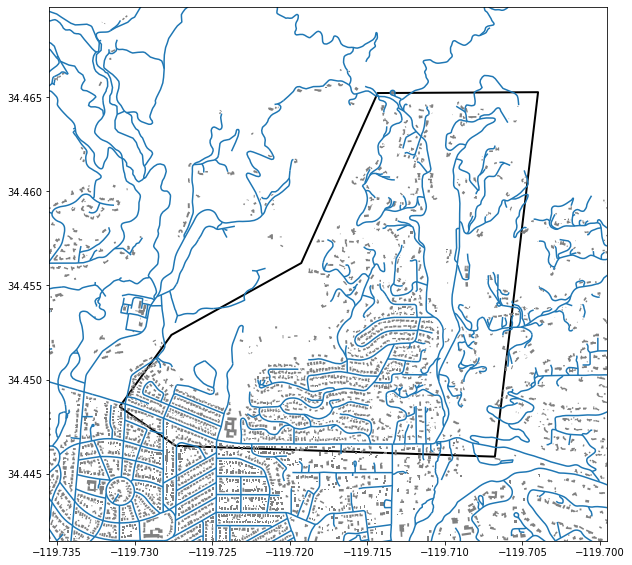

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

sa.plot(ax=ax, color='w', edgecolor='k', lw=2)
bld.plot(ax=ax, color='grey', edgecolor=None)
roads.plot(ax=ax)

# zoom to area
minx, miny, maxx, maxy = sa.total_bounds;
ax.set_xlim(minx-0.0045, maxx+0.0045)
ax.set_ylim(miny-0.0045, maxy+0.0045)

In [40]:
bld.head()

,osm_id,code,fclass,name,type,geometry
0,443498111,1500,building,None,school,"POLYGON ((-119.84760 34.44767, -119.84750 34.4..."
1,443498117,1500,building,None,school,"POLYGON ((-119.84808 34.44772, -119.84795 34.4..."
2,443498115,1500,building,None,school,"POLYGON ((-119.84755 34.44782, -119.84736 34.4..."
3,442961601,1500,building,None,school,"POLYGON ((-119.80114 34.44965, -119.80114 34.4..."
4,6593906,1500,building,None,school,"POLYGON ((-119.80155 34.45005, -119.80155 34.4..."
